In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

path = 'animals/'

categories = ['dogs', 'panda', 'cats']

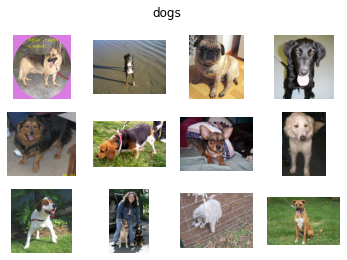

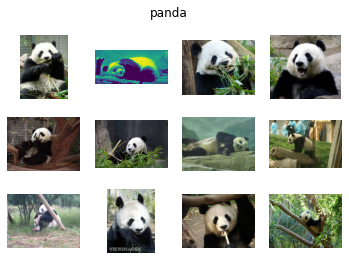

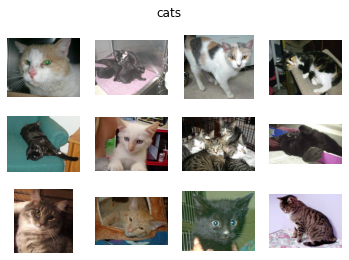

In [15]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [16]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


In [32]:
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3


for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dog', k=1 : 'panda', k=2 : 'cat'

import random
random.shuffle(imagePaths)
print(imagePaths[:10],'\n')

for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT)) 
    data.append(image)
    
    label = imagePath[1]
    labels.append(label)

[['animals/panda/panda_00804.jpg', 1], ['animals/cats/cats_00647.jpg', 2], ['animals/panda/panda_00108.jpg', 1], ['animals/cats/cats_00894.jpg', 2], ['animals/dogs/dogs_00001.jpg', 0], ['animals/panda/panda_00015.jpg', 1], ['animals/cats/cats_00962.jpg', 2], ['animals/cats/cats_00941.jpg', 2], ['animals/panda/panda_00658.jpg', 1], ['animals/cats/cats_00760.jpg', 2]] 



In [18]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

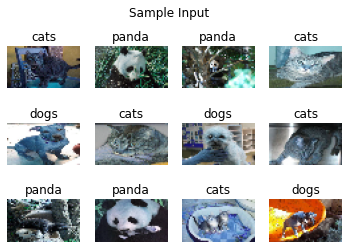

In [19]:
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [20]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [21]:
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


In [22]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

In [23]:
model.fit(trainX, trainY, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
75/75 [==============================] - 5s 52ms/step - loss: 0.9356 - accuracy: 0.5113
Epoch 2/50
75/75 [==============================] - 4s 55ms/step - loss: 0.7761 - accuracy: 0.6050
Epoch 3/50
75/75 [==============================] - 5s 71ms/step - loss: 0.6960 - accuracy: 0.6475
Epoch 4/50
75/75 [==============================] - 4s 52ms/step - loss: 0.6642 - accuracy: 0.6746
Epoch 5/50
75/75 [==============================] - 4s 47ms/step - loss: 0.6258 - accuracy: 0.6954
Epoch 6/50
75/75 [==============================] - 4s 53ms/step - loss: 0.5734 - accuracy: 0.7300
Epoch 7/50
75/75 [==============================] - 4s 53ms/step - loss: 0.5513 - accuracy: 0.7433
Epoch 8/50
75/75 [==============================] - 4s 55ms/step - loss: 0.5067 - accuracy: 0.7546
Epoch 9/50
75/75 [==============================] - 4s 52ms/step - loss: 0.4866 - accuracy: 0.7775
Epoch 10/50
75/75 [==============================] - 4s 51ms/step - loss: 0.4459 - accuracy: 0.7971
Epoch 11/

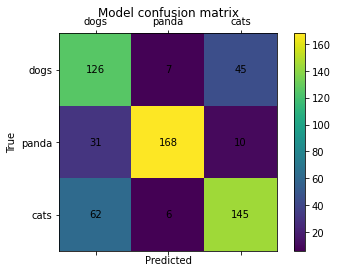

Accuracy : 73.17%


In [24]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) 

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [25]:
model.save('model_animal_cnn_1.h5')

Prediction : cats


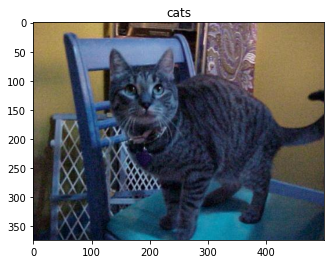

In [28]:
test_data=[]
test_image_o = cv2.imread('animals/cats/cats_00001.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])

plt.imshow(test_image_o)

Prediction : dogs


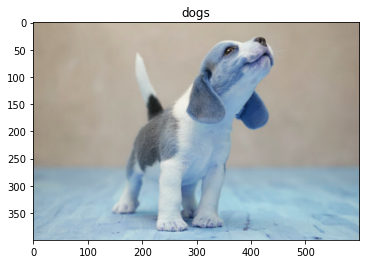

In [30]:
test_data=[]
test_image_o = cv2.imread('animals/images/dog.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT)) 
test_data.append(test_image)

test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) 
print ('Prediction : '+categories[predictions[0]])

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

Prediction : panda


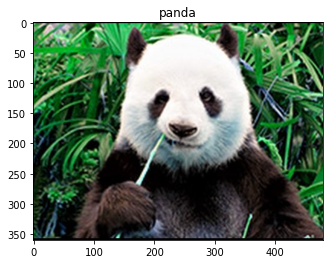

In [31]:
test_data=[]
url = 'animals/images/panda.jpg'
test_image_o = cv2.imread(url)
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  
test_data.append(test_image)

test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) 
print ('Prediction : '+categories[predictions[0]])

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)